## Random walker vs. Distance function

In [1]:
%matplotlib notebook
%qtconsole
%load_ext autoreload
%autoreload 2

/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import skimage as sk
from skimage.segmentation import random_walker

<IPython.core.display.Javascript object>


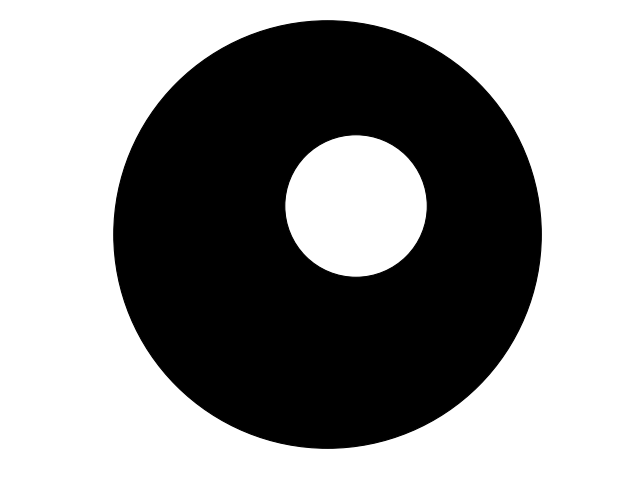

In [124]:
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

fig = plt.figure()
fig.add_subplot(111)

fig.tight_layout(pad=0)


# no bounding box
myplot=plt.axes(frameon=False)

circle = plt.Circle((0, 0), radius=0.75, fc='k')
plt.gca().add_patch(circle)

inner = plt.Circle((0.1,0.1), radius=0.25,fc='w')
plt.gca().add_patch(inner)

#square = plt.Rectangle((-1,-0.5),0.5,0.3, fc='k')
#plt.gca().add_patch(square)

# hide axes
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.axis('scaled')
plt.show()

# simplest is to save to a file
plt.savefig("./circles.png")
# saving to a numpy array
# this is essentially not working
#fig=plt.gcf()
#fig.canvas.draw()
#data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
#data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

<IPython.core.display.Javascript object>


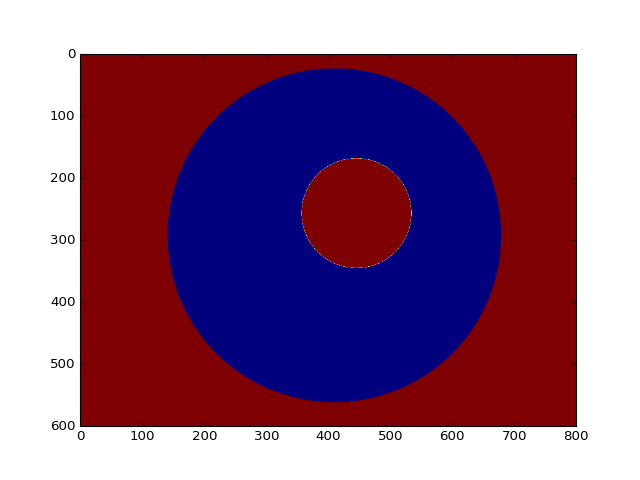

In [125]:
from PIL import Image
C2img = Image.open("circles.png")
C2np = np.array(C2img)[:,:,0].copy() ## only first component

plt.figure()
plt.imshow(C2np)

## binarize, label, distances

<IPython.core.display.Javascript object>


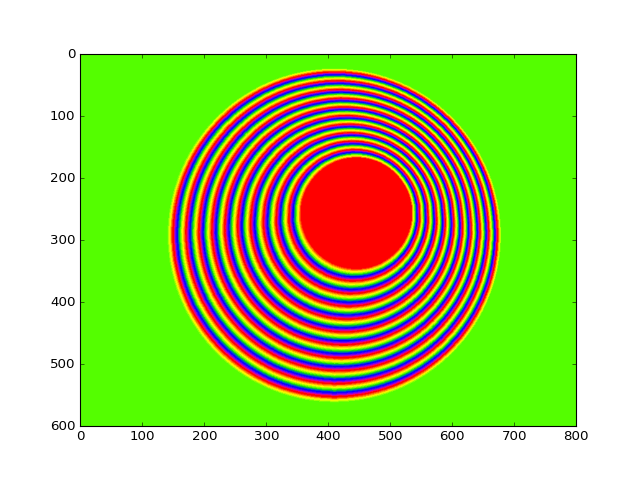

In [126]:
import pink

C2p = pink.numpy2pink(C2np)
C2T = pink.cpp.seuil(C2p,128)
lbl = pink.cpp.labelfgd(C2T,8)
#pink.imview(lbl)
lblnp = pink.pink2numpy(lbl)
inner = (lblnp==2).astype('uint8')*255
outer = (lblnp==1).astype('uint8')*255
innerp = pink.numpy2pink(inner)
outerp = pink.numpy2pink(outer)
di = pink.cpp.dist(innerp,5)
do = pink.cpp.dist(outerp,5)

## wtf is that ?
din = pink.pink2numpy(di)
don = pink.pink2numpy(do)
lvl = din / (din+don)
plt.figure()
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
plt.imshow(lvl,cmap=plt.get_cmap('prism'))
# lvlp = pink.numpy2pink(lvl)
# pink.imview(lvlp)

plt.savefig("DistanceResult")

## RW version

In [127]:
region = (lblnp == 0).astype('float64')
# beta = 0 implies constant weights
rw = random_walker(region,lblnp,beta=0,return_full_prob=True)
#pink.imview(pink.numpy2pink(rw[1,:,:]))

<IPython.core.display.Javascript object>


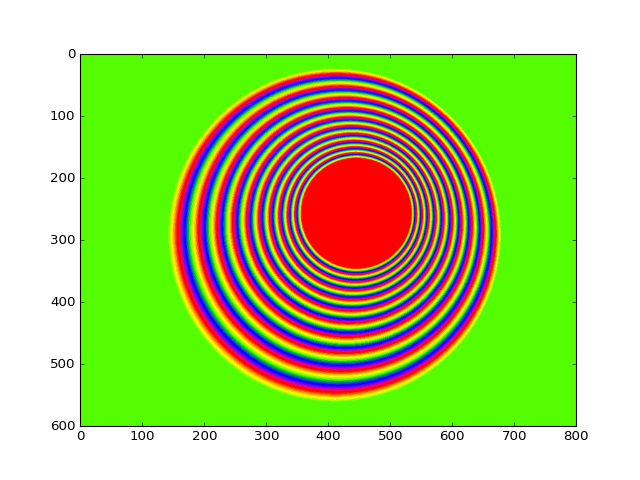

In [128]:
plt.figure()
plt.imshow(rw[0,:,:],cmap=plt.get_cmap('prism'))
plt.savefig("RWResult")